Start your notebook here:

In [52]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy

#import the libraries we'll be using

import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from dateutil.parser import parse

Defaulting to user installation because normal site-packages is not writeable


In [53]:
filepath = "IMDb_2000_movies.csv"
data = pd.read_csv(filepath, index_col=0)
data.head()

,Movie Name,Year of Release,IMDB Rating
Movie Rank,,,
1,The Godfather,1972,9.2
2,T�ky� monogatari,1953,8.1
3,Shichinin no samurai,1954,8.6
4,The Godfather Part II,1974,9.0
5,Casablanca,1942,8.5


In [54]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 1000
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movie Name       2000 non-null   object 
 1   Year of Release  2000 non-null   object 
 2   IMDB Rating      2000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 62.5+ KB


In [55]:
total_null = data.isnull().sum().sort_values(ascending = False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  2000


,Total Missing,In Percent
Movie Name,0,0.0
Year of Release,0,0.0
IMDB Rating,0,0.0


As it turns out, there is no missing `data` from the table, so there's no need to fill it in or replace it.

In [56]:
data = data.drop_duplicates()
data.shape

(1100, 3)

In [57]:
data

,Movie Name,Year of Release,IMDB Rating
Movie Rank,,,
1,The Godfather,1972,9.2
2,T�ky� monogatari,1953,8.1
3,Shichinin no samurai,1954,8.6
4,The Godfather Part II,1974,9.0
5,Casablanca,1942,8.5
...,...,...,...
96,The Thief of Bagdad,1924,7.7
97,Lost in Translation,2003,7.7
98,Ying xiong,2002,7.9


In [58]:
data.describe()

,IMDB Rating
count,1100.000000
mean,7.815455
std,0.388550
min,5.700000
25%,7.600000
50%,7.800000
75%,8.100000
max,9.300000


In [63]:
data['Movie Name'] = data['Movie Name'].str.strip().str.title()

# create a sample DataFrame with a column containing multiple values
df_team = pd.DataFrame({
    'Year of Release': data['Year of Release'].tolist(),
    'Movie Name': data['Movie Name'].tolist()
})

# use the explode method to transform the 'Movie Name' column
df_team = df_team.explode('Movie Name')
df_team.sort_values('Year of Release', ascending=False)

,Year of Release,Movie Name
90,2019,The Farewell I
291,2019,Avengers: Endgame
1031,2019,Once Upon A Time In... Hollywood
990,2019,Shazam!
835,2019,Booksmart
...,...,...
68,1920,Das Cabinet Des Dr. Caligari
1033,1916,Intolerance: Love'S Struggle Throughout The Ages
855,1915,Les Vampires
965,1915,The Regeneration


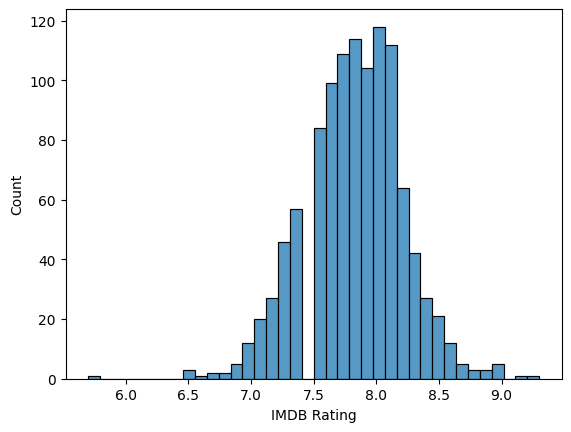

In [65]:
top_rating = data[['Movie Name', 'IMDB Rating']].sort_values(by = 'IMDB Rating', ascending = False)

sns.histplot(data = data['IMDB Rating'])

plt.show()

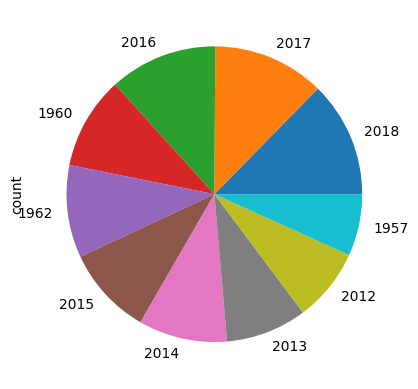

In [85]:
pie_data = pd.DataFrame(df_team.value_counts())
pie_plot = df_team.value_counts('Year of Release').head(10).plot(kind='pie')

In [94]:
new_data = data[['Year of Release', 'IMDB Rating']]
new_data = new_data.groupby('Year of Release')[['IMDB Rating']].sum().reset_index()
new_data = new_data.sort_values(by='IMDB Rating', ascending=False)
new_data

,Year of Release,IMDB Rating
116,2018,227.2
115,2017,218.5
114,2016,214.9
45,1962,190.2
43,1960,188.4
...,...,...
50,1966 TV Movie,8.0
98,2002 TV Special,7.9
2,1916,7.7
103,2006 TV Movie,7.5


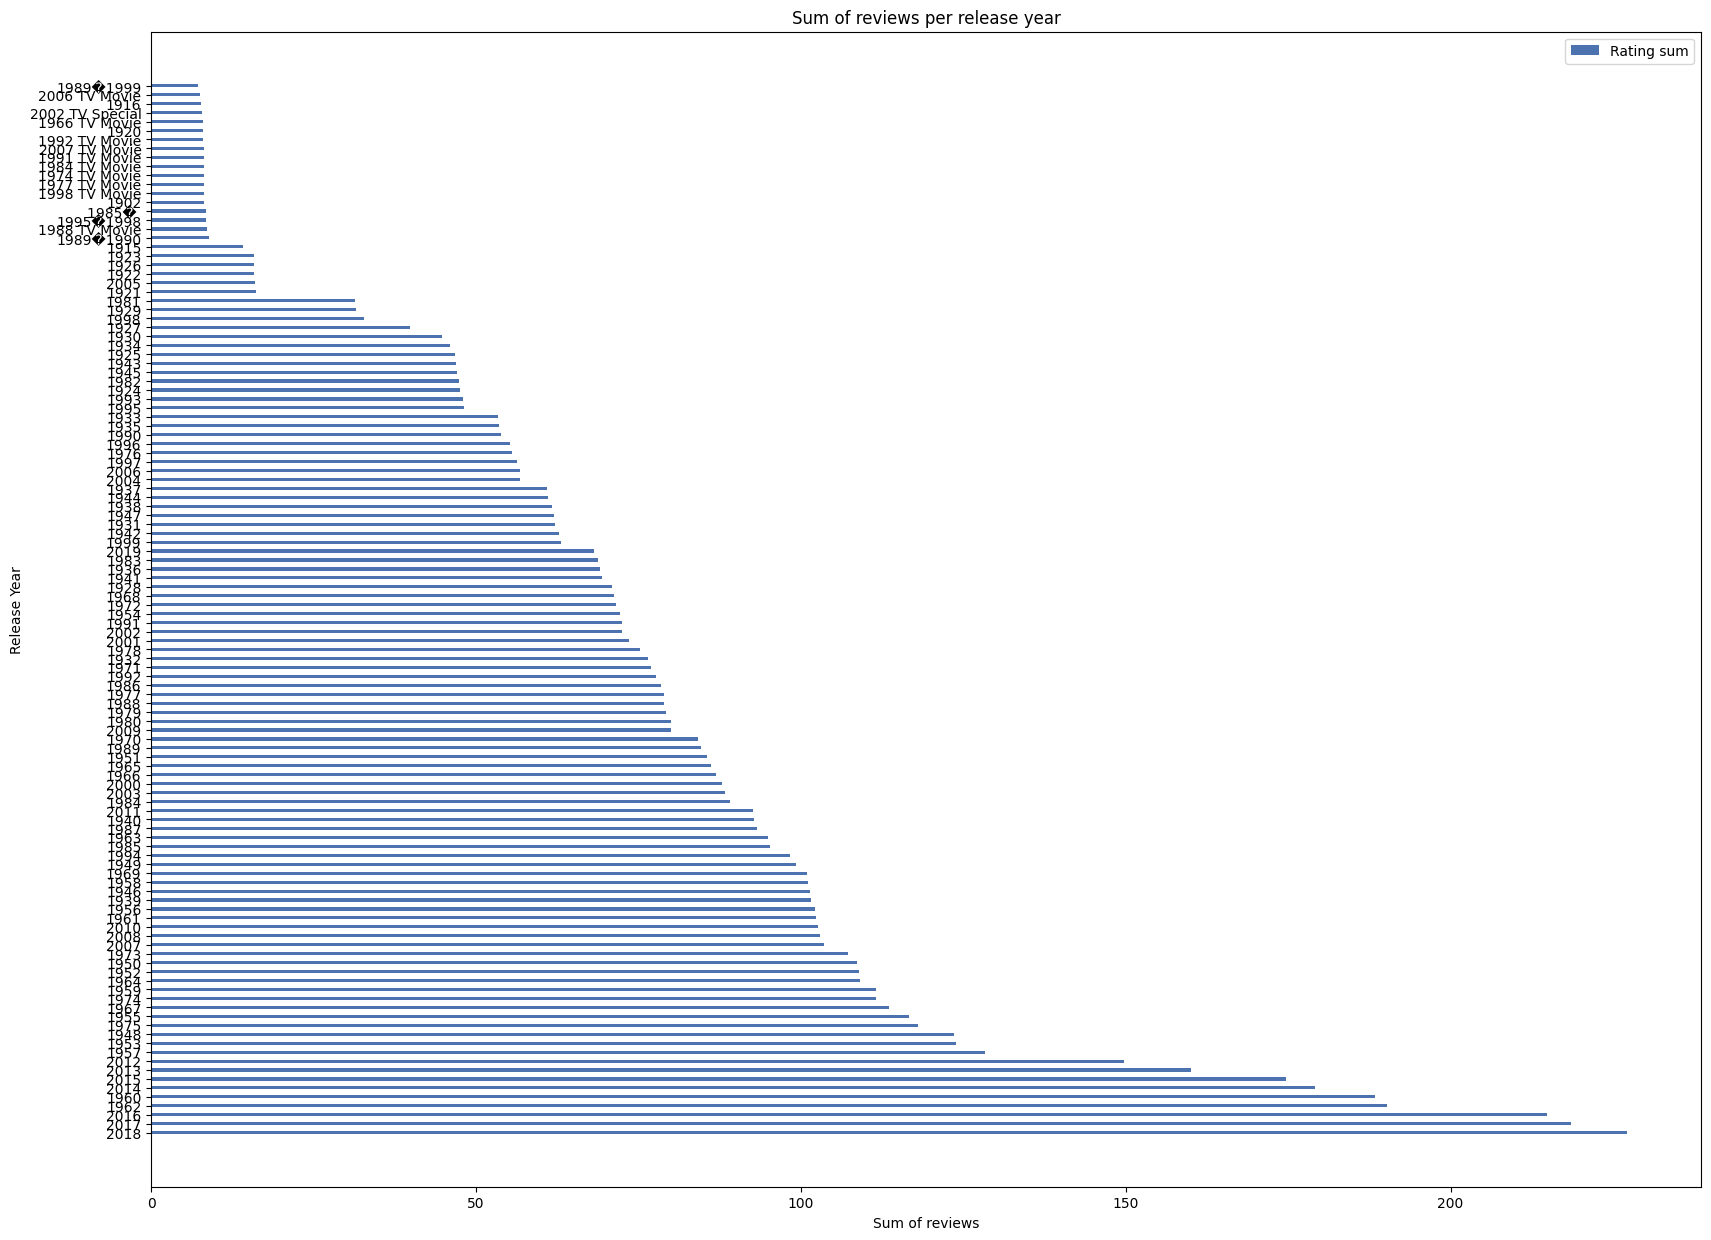

In [96]:
fig, ax = plt.subplots(figsize=(20, 15))
bar_width = 0.35
bar1 = ax.barh(new_data['Year of Release'].tolist(), new_data['IMDB Rating'], bar_width, label='Rating sum', color='#4c72b0')


ax.set_xlabel('Sum of reviews')
ax.set_ylabel('Release Year')
ax.set_title('Sum of reviews per release year')
ax.legend(loc='upper right')